# Descrição

Notebook destinado para obter um valor aproximado para $\pi$ pelo [método de Monte Carlo](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Monte_Carlo), sendo um método método estatístico para determinar resultados númericos aproximados 

# Módulos

In [11]:
from random import random, randrange
from math import cos, sin, pi, sqrt
import matplotlib.pyplot as plt

# Funções

## Construção do Círculo

Função que gerar valores númericos necessários para construção da círculo, por padrão o centro tem coordenadas a $x = 0$ e $y = 0$ e raio de valor $\text{r} = 1$, os valores podem se alterados de acordo com o interesse do usuário.

In [12]:
#Construção do circulo
def circulo(x = 0, y = 0, raio = 1):
    a = [x + raio*cos(pi*ang/180) for ang in range(361)]
    b = [y + raio*sin(pi*ang/180) for ang in range(361)]
    return a,b

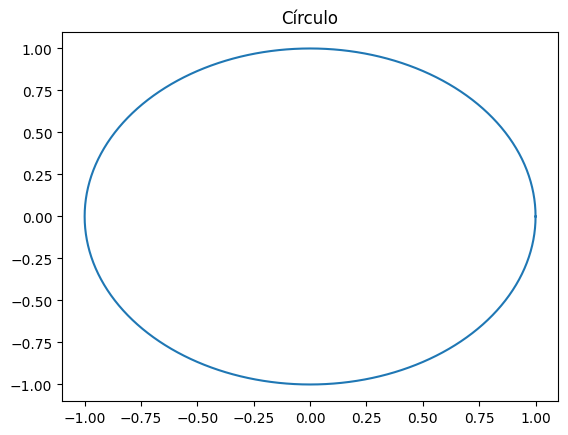

In [13]:
#Coordenadas dos círculo
x, y = circulo()

#Gráfico
plt.plot(x,y)
plt.title("Círculo")

plt.show()

## Construção de Quadrado

Função que gerar os valores númericos para construção de um quadrado que contenha os círculo, como parâmetro são utilizados as coordenadas do centro do círculo e raio do mesmo. 

In [14]:
#Construção dos quadrado
def quadrado(x = 0,y = 0, raio = 1):
    
    a = (x - raio, y - raio)
    b = (x + raio, y - raio)
    c = (x + raio, y + raio)
    d = (x - raio, y + raio)
    
    return [a[0],b[0],c[0],d[0],a[0]], [a[1],b[1],c[1],d[1],a[1]]  

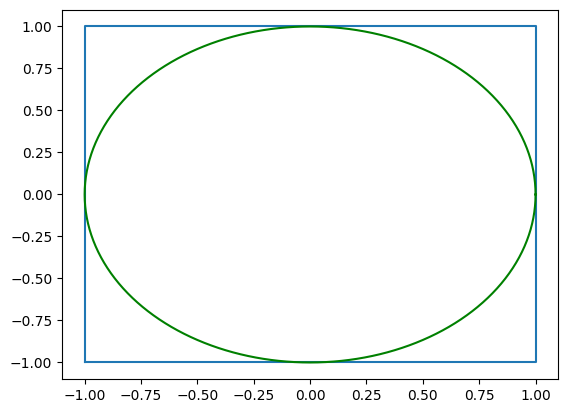

In [15]:
#Cooordenadas dos vertices dos quadrado
x, y = quadrado()
z, k = circulo()

#Desenho
plt.plot(x, y)
plt.plot(z, k, color = 'g')

plt.show()

## Gerar pontos aleatórios

Função que gerar as coordenadas para criação de pontos aleatórios que estejam contidos no quadrado que circunscrever o círculo, utilizando como parâmetros as coordenadas do centro do círculo e raio do mesmo, por padrão serão gerando coordenadas para criação de dez pontos aleatórios. 

In [16]:
#n pontos aleatórios
def pontos(x = 0, y = 0, raio = 1, n = 10):
    
    a = [x + (-1)**randrange(1,3)*raio*random() for i in range(n)]
    b = [y + (-1)**randrange(1,3)*raio*random() for i in range(n)]
    
    return a, b

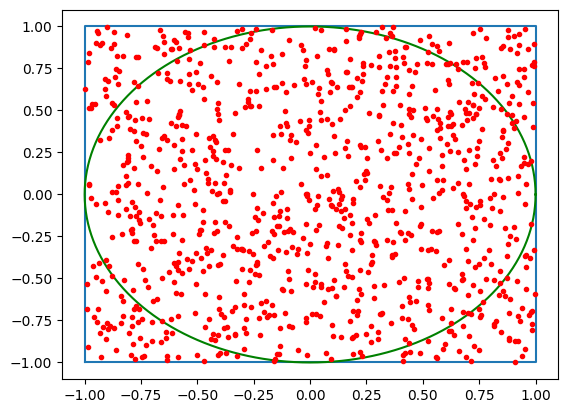

In [17]:
#Coordenadas dos n pontos
x, y = quadrado()
z, k = circulo()
t, l = pontos(n = 1000)

#Gráficos
plt.plot(x, y) #Quadrado
plt.plot(z, k, color = 'g') #Círculo
plt.plot(t, l,  linestyle = ' ', color = 'r', marker = '.') #Pontos

plt.show()

# Método para aproximação de pi

Sendo $n$ o número de pontos contidos no círculo e $m$ o número de pontos contidos no quadrado, admitidos esses pontos gerados de maneira aleatório, esperamos que a razão $n/m$ fique cada vez mais próxima da razão $A_{c}$/$A_{q}$, onde $A_{c}$ corresponde a área do círculo e $A_{q}$ a área do quadrado.

<p>
<center>
$\begin{align*}
\frac{A_{c}}{A_{q}}\approx\frac{n}{m}\to\frac{\pi\cdot r^{2}}{(2\cdot r)^2}\approx\frac{n}{m}\to\pi\approx 4\cdot\frac{n}{m}
\end{align*}
$
<center>
<p>

In [18]:
def valor_pi(x = 0, y = 0, raio = 1,  n = 10, grafico = False):
    
    #Funções de construção
    a, b = pontos(x = x, y = y, raio = raio, n = n)
    if grafico == True:
        c, d = circulo(x = x, y = y, raio = raio)
        e, f = quadrado(x = x,y = y, raio = raio)
    
    #Gráfico
    if grafico == True:
        plt.plot(a, b, linestyle = ' ', color = 'r', marker = '.') #Pontos aleatórios
        plt.plot(c, d, color = 'g') #Círculo
        plt.plot(e,f) #Quadrado
    
    #Contagem dos pontos internos ao círculo
    count = 0
    for i in range(len(a)):
        d = (x - a[i])**2 + (y - b[i])**2
        if sqrt(d) <= raio:
            count += 1
    
    print(f"valor aproximado de pi: {4*(count/len(a))}")

In [19]:
#Testando para círculo de centro (2,3) e raio igual a 3
valor_pi(x = 2, y = 3, raio = 3, n = 1000, grafico = False)

valor aproximado de pi: 3.152


valor aproximado de pi: 3.16


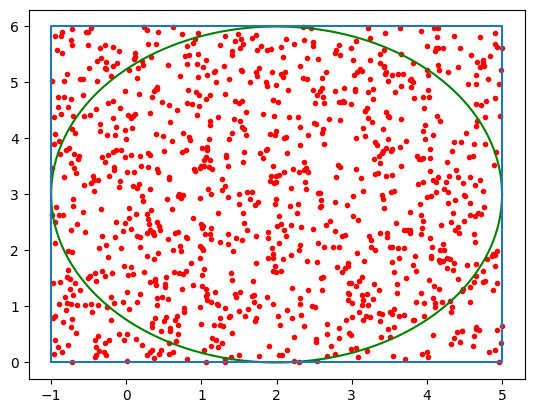

In [20]:
#Testando para círculo de centro (2,3) e raio igual a 3
valor_pi(x = 2, y = 3, raio = 3, n = 1000, grafico = True)